In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib

time data of each tweet

In [2]:
from os import listdir
from os.path import isfile, join

import json

mypath = "/home/yuvenious/election_tweets"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

archive_path1 = "./Archive/"
archive_path2 = "./Archive/Topic Modeling/"

In [3]:
start = time.time()
all_tweets = []
for i, jfile in enumerate(onlyfiles[:]):
    fullpath = join(mypath, jfile)
    print(i, "%s started"%jfile)
    start = time.time()
        
    with open(fullpath, "r") as f:
        data = json.load(f)
        text_dict = {}
        for tweet in data:
            id_in_keys = "id" in tweet.keys()
            text_in_keys = "text" in tweet.keys()
            if id_in_keys & text_in_keys:
                text_none = tweet["text"] == None
                if not text_none:
                    text_dict[tweet["id"]] = tweet["created_at"]
        np.save(archive_path2+"time_created%s.npy"%i, text_dict)
        print(i, "%s saved"%jfile)
    end = time.time()
    print(i, "%s finished"%jfile, len(text_dict), round(end-start, 2), "sec")

0 full_tweet_non_english2202.json started
0 full_tweet_non_english2202.json saved
0 full_tweet_non_english2202.json finished 54080 5.27 sec
1 full_tweet_non_english2303.json started
1 full_tweet_non_english2303.json saved
1 full_tweet_non_english2303.json finished 131629 11.96 sec
2 full_tweet_non_english5303.json started
2 full_tweet_non_english5303.json saved
2 full_tweet_non_english5303.json finished 115525 10.33 sec
3 full_tweet_non_english3303.json started
3 full_tweet_non_english3303.json saved
3 full_tweet_non_english3303.json finished 135285 11.35 sec
4 full_tweet_non_english4303.json started
4 full_tweet_non_english4303.json saved
4 full_tweet_non_english4303.json finished 146090 11.76 sec
5 full_tweet_non_english1202.json started
5 full_tweet_non_english1202.json saved
5 full_tweet_non_english1202.json finished 96057 10.03 sec
6 full_tweet_non_english6303.json started
6 full_tweet_non_english6303.json saved
6 full_tweet_non_english6303.json finished 21682 1.76 sec
7 full_twee

In [4]:
time_created = {}
for i in range(len(onlyfiles)):
    dict_path = archive_path2+"time_created%s.npy"%i
    tweets = np.load(dict_path).item()
    time_created.update(tweets)
time_created = pd.Series(time_created)
len(time_created)

795867

In [5]:
df_vec = pd.read_csv(archive_path1+"vectorized_data.csv", index_col=0)
word_list = df_vec.columns
ids = df_vec.index

In [6]:
topics = 9
count = topics - 3
count = "0"+str(count)
lda_output = np.load(archive_path2+"lda_output_%s.npy"%count)
lda_components = np.load(archive_path2+"lda_components_%s.npy"%count)
order = pd.DataFrame(lda_output).sum().sort_values(ascending=False).index

In [7]:
# column names
topic_names = ["Topic" + str(i+1) for i in range(topics)]
# index names
tweet_keys = ids

df_document_topic = pd.DataFrame(data = np.round(lda_output, 2), index=tweet_keys)
df_document_topic = df_document_topic[order]
df_document_topic.columns = topic_names

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['Dominant'] = dominant_topic+1

df_document_topic.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Dominant
962039384739430400,0.06,0.06,0.06,0.06,0.06,0.56,0.06,0.06,0.06,6
962039446026698752,0.02,0.02,0.02,0.02,0.02,0.16,0.02,0.02,0.73,9
962039802462982144,0.02,0.19,0.02,0.02,0.19,0.02,0.02,0.35,0.19,8
962040477162790913,0.01,0.01,0.01,0.01,0.14,0.26,0.01,0.51,0.01,8
962040484519493633,0.22,0.02,0.42,0.02,0.22,0.02,0.02,0.02,0.02,3


In [8]:
from datetime import datetime

In [9]:
time_created = time_created.apply(lambda x: datetime.strptime(x, "%a %b %d %X %z %Y"))
time_created = pd.DataFrame(time_created, columns = ["time"])
time_created.head()

,time
971292052045680640,2018-03-07 07:50:45+00:00
971292069305122816,2018-03-07 07:50:49+00:00
971292104981958658,2018-03-07 07:50:58+00:00
971292122035957760,2018-03-07 07:51:02+00:00
971292169154781184,2018-03-07 07:51:13+00:00


In [10]:
topic_time = df_document_topic.join(time_created)[["Dominant", "time"]]
topic_time["Dominant"] = topic_time["Dominant"].apply(lambda x: str(x))
topic_time["Date"] = topic_time["time"].apply(lambda x: x.date)

topic_time.head()

,Dominant,time,Date
962039384739430400,6,2018-02-09 19:03:57+00:00,2018-02-09
962039446026698752,9,2018-02-09 19:04:12+00:00,2018-02-09
962039802462982144,8,2018-02-09 19:05:37+00:00,2018-02-09
962040477162790913,8,2018-02-09 19:08:18+00:00,2018-02-09
962040484519493633,3,2018-02-09 19:08:20+00:00,2018-02-09


In [11]:
topic_date = topic_time[["Dominant", "Date"]].reset_index(drop=True)
topic_date.head()

,Dominant,Date
0,6,2018-02-09
1,9,2018-02-09
2,8,2018-02-09
3,8,2018-02-09
4,3,2018-02-09


In [12]:
topics = topic_date["Dominant"].unique()
topics.sort()
topics

array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [13]:
dates = topic_date["Date"].unique()
dates.sort()
l = []

for d in dates:
    data = topic_date[topic_date["Date"] == d]
    data = data["Dominant"].value_counts().sort_index().values
    l.append(data)
topic_date = pd.DataFrame(np.array(l), index=dates, columns="topic"+topics)
topic_date

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
2018-02-09,1273,1056,770,550,1024,684,348,462,124
2018-02-10,4915,5766,2984,1738,2943,2305,960,1659,491
2018-02-11,3774,2862,2215,2077,2003,1781,675,896,258
2018-02-12,7017,2478,2440,1926,2921,1755,5852,660,1406
2018-02-13,8151,3837,2885,3847,2726,2140,6100,1709,2016
2018-02-14,6152,3624,2512,1970,1260,829,1925,713,811
2018-02-15,7796,3751,2860,2046,2092,3487,1262,694,733
2018-02-16,3338,1491,1048,959,809,2297,379,421,189
2018-02-17,5194,2823,2341,1472,1661,1376,837,422,503
2018-02-18,5781,2101,2257,2177,1636,1143,982,412,864


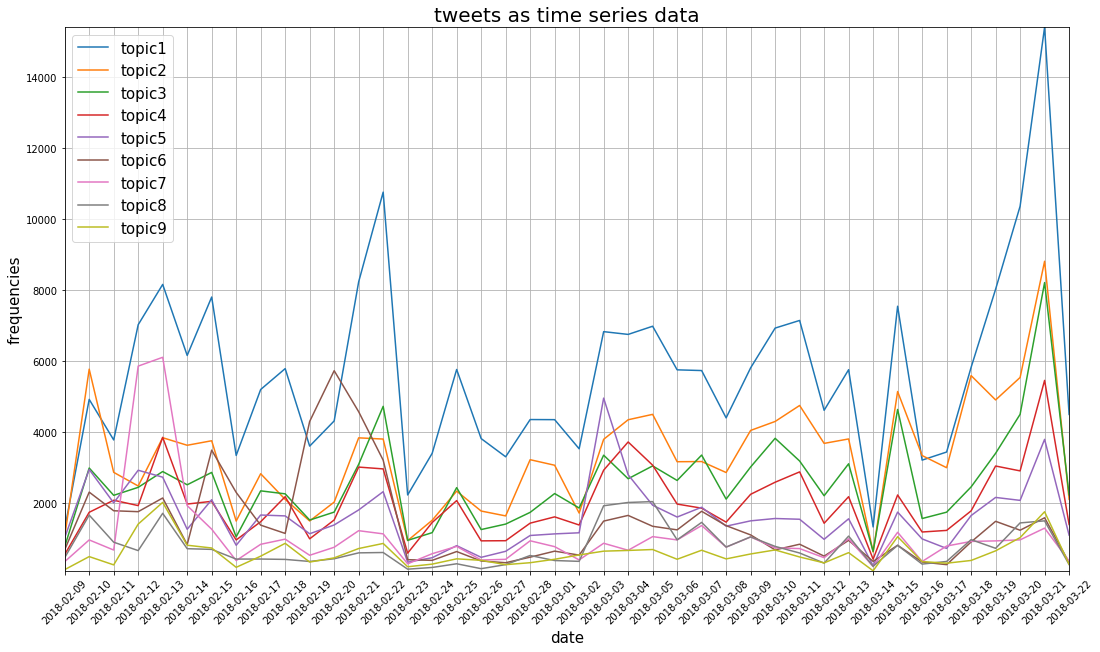

In [14]:
fig,ax=plt.subplots()
topic_date.plot(ax=ax)
ax.set_xticks(topic_date.index)
ax.set_xticklabels((topic_date.index), rotation = 45)
ax.grid()
ax.set_title("tweets as time series data", size=20)
ax.set_ylabel("frequencies", size=15)
ax.set_xlabel("date",size=15)
ax.legend(fontsize=15)
ax.autoscale(tight=True)
fig.set_size_inches(18,10)

# HOURS

In [16]:
topic_time["Date_Hour"] = topic_time["time"].apply(lambda x: x.strftime("%Y-%m-%d %H")).values
topic_time.head()

,Dominant,time,Date,Date_Hour
962039384739430400,6,2018-02-09 19:03:57+00:00,2018-02-09,2018-02-09 19
962039446026698752,9,2018-02-09 19:04:12+00:00,2018-02-09,2018-02-09 19
962039802462982144,8,2018-02-09 19:05:37+00:00,2018-02-09,2018-02-09 19
962040477162790913,8,2018-02-09 19:08:18+00:00,2018-02-09,2018-02-09 19
962040484519493633,3,2018-02-09 19:08:20+00:00,2018-02-09,2018-02-09 19


In [17]:
topic_date = topic_time[["Dominant", "Date_Hour"]].reset_index(drop=True)
topic_date.head()

,Dominant,Date_Hour
0,6,2018-02-09 19
1,9,2018-02-09 19
2,8,2018-02-09 19
3,8,2018-02-09 19
4,3,2018-02-09 19


In [18]:
topic_date = topic_date.pivot_table(index="Date_Hour", columns="Dominant", aggfunc=len)
topic_date.columns = "topic"+topics
topic_date.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
Date_Hour,,,,,,,,,
2018-02-09 19,187.0,146.0,135.0,84.0,103.0,105.0,73.0,45.0,31.0
2018-02-09 20,318.0,270.0,171.0,149.0,267.0,157.0,100.0,130.0,21.0
2018-02-09 21,326.0,287.0,162.0,137.0,295.0,149.0,88.0,132.0,27.0
2018-02-09 22,267.0,227.0,179.0,106.0,245.0,151.0,58.0,78.0,25.0
2018-02-09 23,175.0,126.0,123.0,74.0,114.0,122.0,29.0,77.0,20.0


In [19]:
from datetime import timedelta
time_index=[]
for i in range(42*24):
    dt = datetime(2018, 2, 9)+timedelta(hours=i)
    time_index.append(dt.strftime("%Y-%m-%d %H"))

In [20]:
df_timeindex = pd.DataFrame(index=time_index)

In [21]:
topic_date = pd.merge(df_timeindex, topic_date, how="outer", left_index=True, right_index=True).fillna(0)
topic_date.tail(300).head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
2018-03-10 12,533.0,367.0,247.0,151.0,95.0,44.0,37.0,54.0,47.0
2018-03-10 13,595.0,366.0,248.0,148.0,125.0,47.0,50.0,49.0,36.0
2018-03-10 14,489.0,271.0,280.0,200.0,133.0,25.0,59.0,56.0,37.0
2018-03-10 15,494.0,260.0,275.0,188.0,122.0,45.0,61.0,54.0,35.0
2018-03-10 16,455.0,242.0,288.0,206.0,107.0,34.0,49.0,47.0,78.0


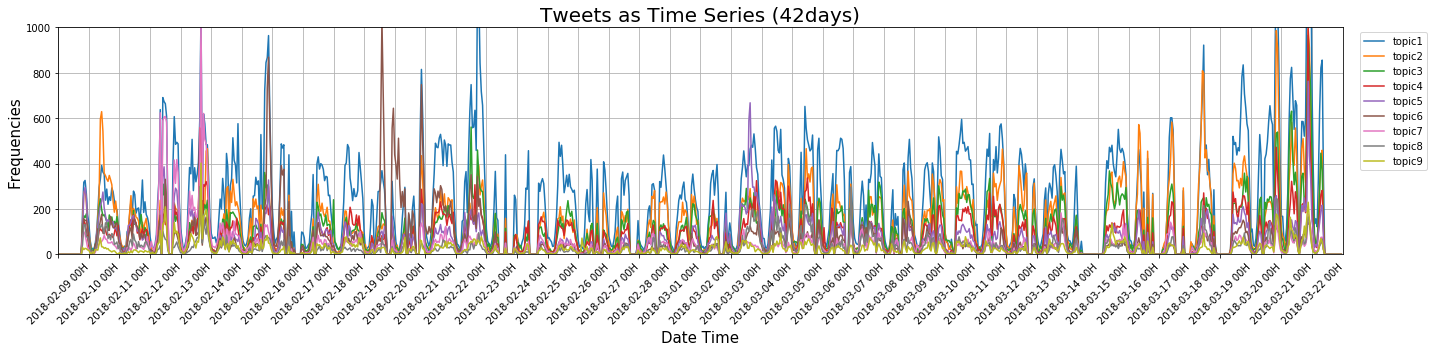

In [22]:
df= topic_date

fig,ax=plt.subplots(figsize=(20,5))
df.plot(ax=ax)
ax.grid()
ax.set_xticks(range(len(df))[::24])
ax.set_xticklabels(topic_date[::24].index+"H", rotation=45)
ax.set_title("Tweets as Time Series (42days)", size=20)
ax.set_ylabel("Frequencies", size=15)
ax.set_xlabel("Date Time",size=15)
ax.set_ylim(0,1000)
ax.set_xlim(0,len(df))
ax.legend(bbox_to_anchor=(1.01,1), loc="upper left")
fig.tight_layout()

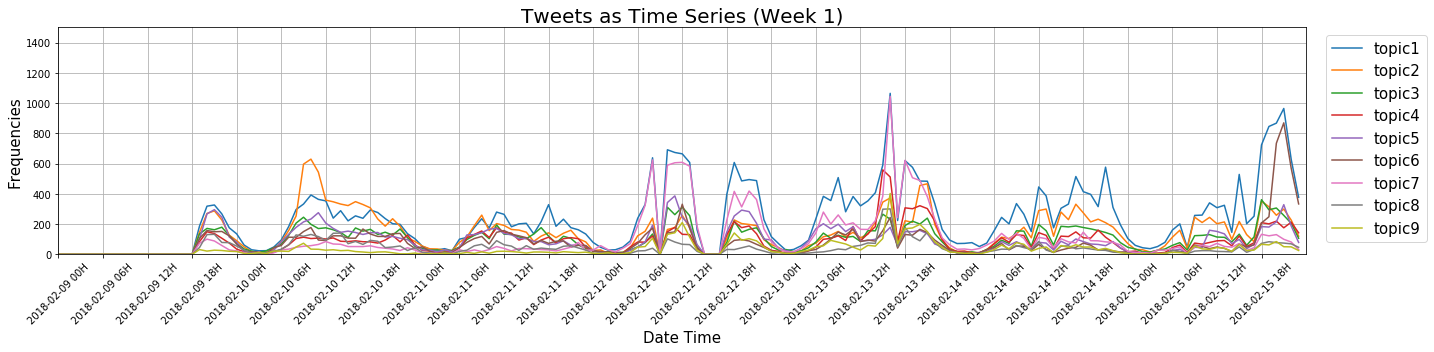

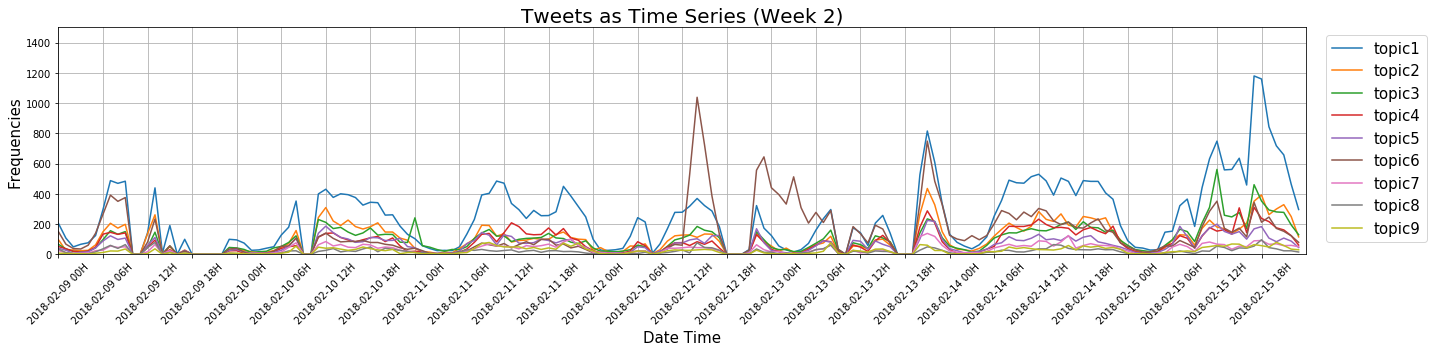

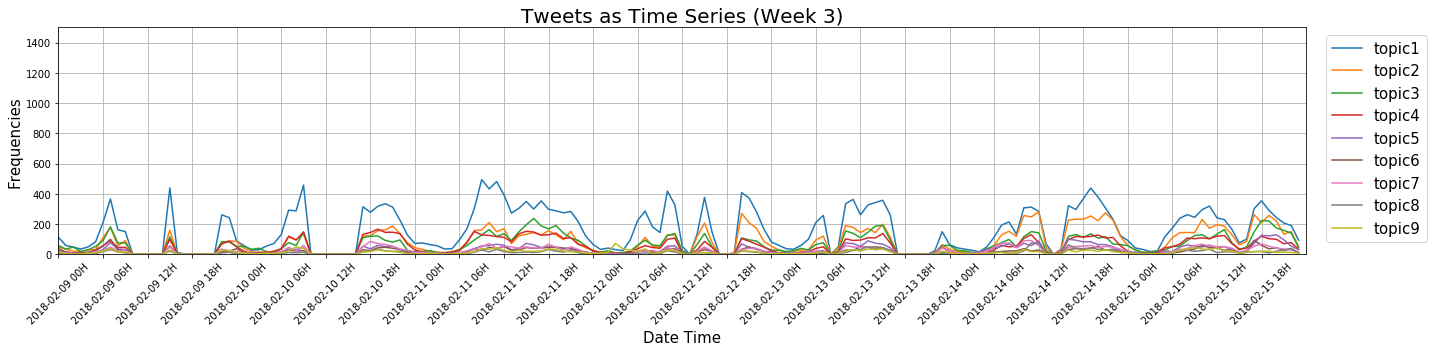

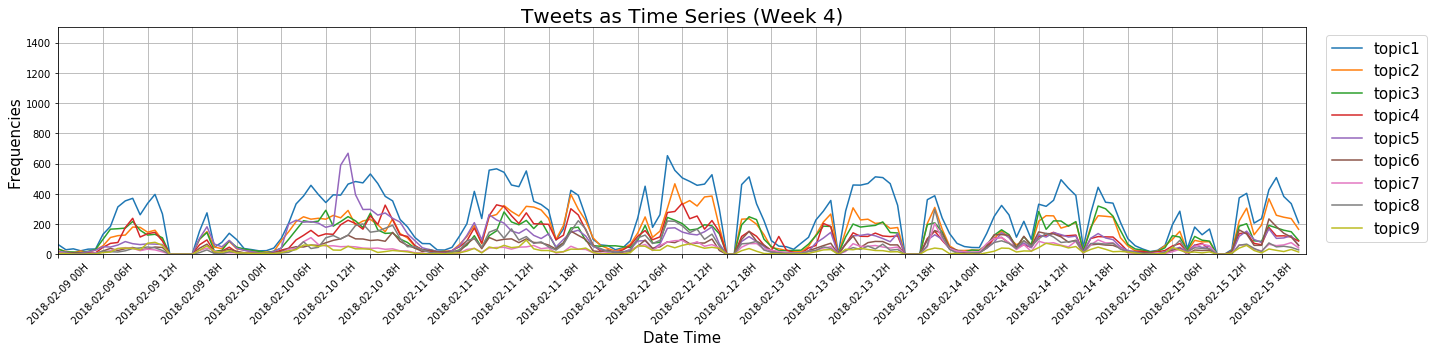

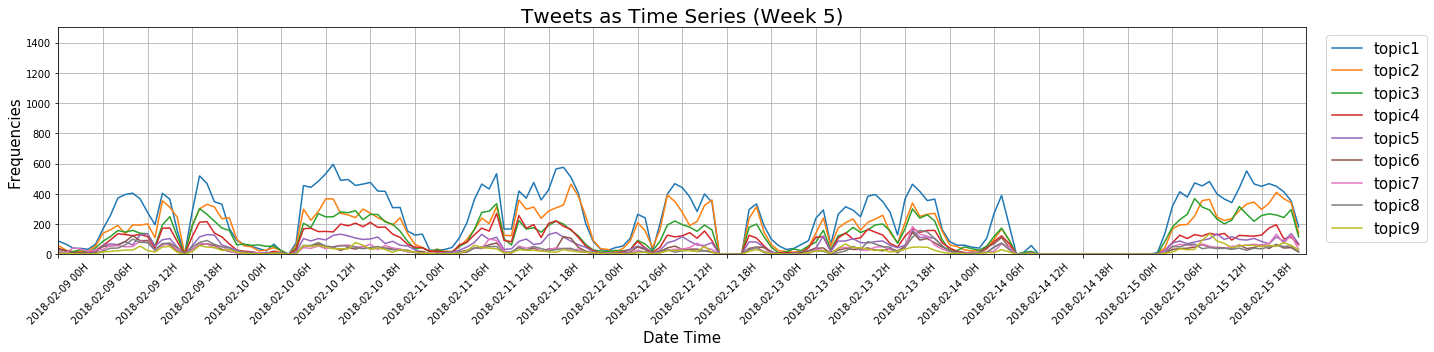

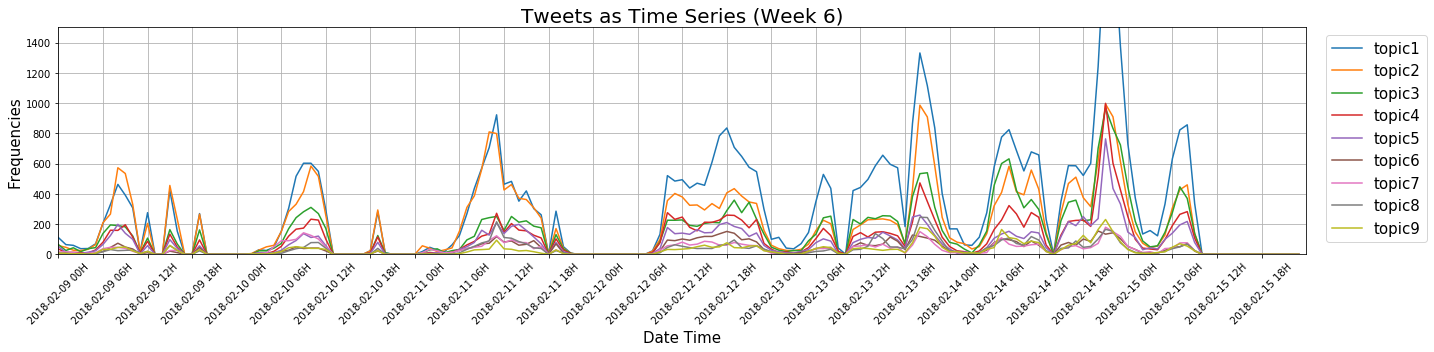

In [23]:
for i in range(6):
    df = topic_date[i*7*24:(i+1)*7*24]

    fig,ax=plt.subplots(figsize=(20,5))
    df.plot(ax=ax)
    ax.grid()
    ax.set_xticks(range(len(df))[::6])
    ax.set_xticklabels(topic_date[::6].index+"H", rotation=45)
    ax.set_title("Tweets as Time Series (Week %s)"%(i+1), size=20)
    ax.set_ylabel("Frequencies", size=15)
    ax.set_xlabel("Date Time",size=15)
    ax.set_ylim(0,1500)
    ax.set_xlim(0,len(df))
    ax.legend(bbox_to_anchor=(1.01,1), loc="upper left", fontsize=15)
    fig.tight_layout()

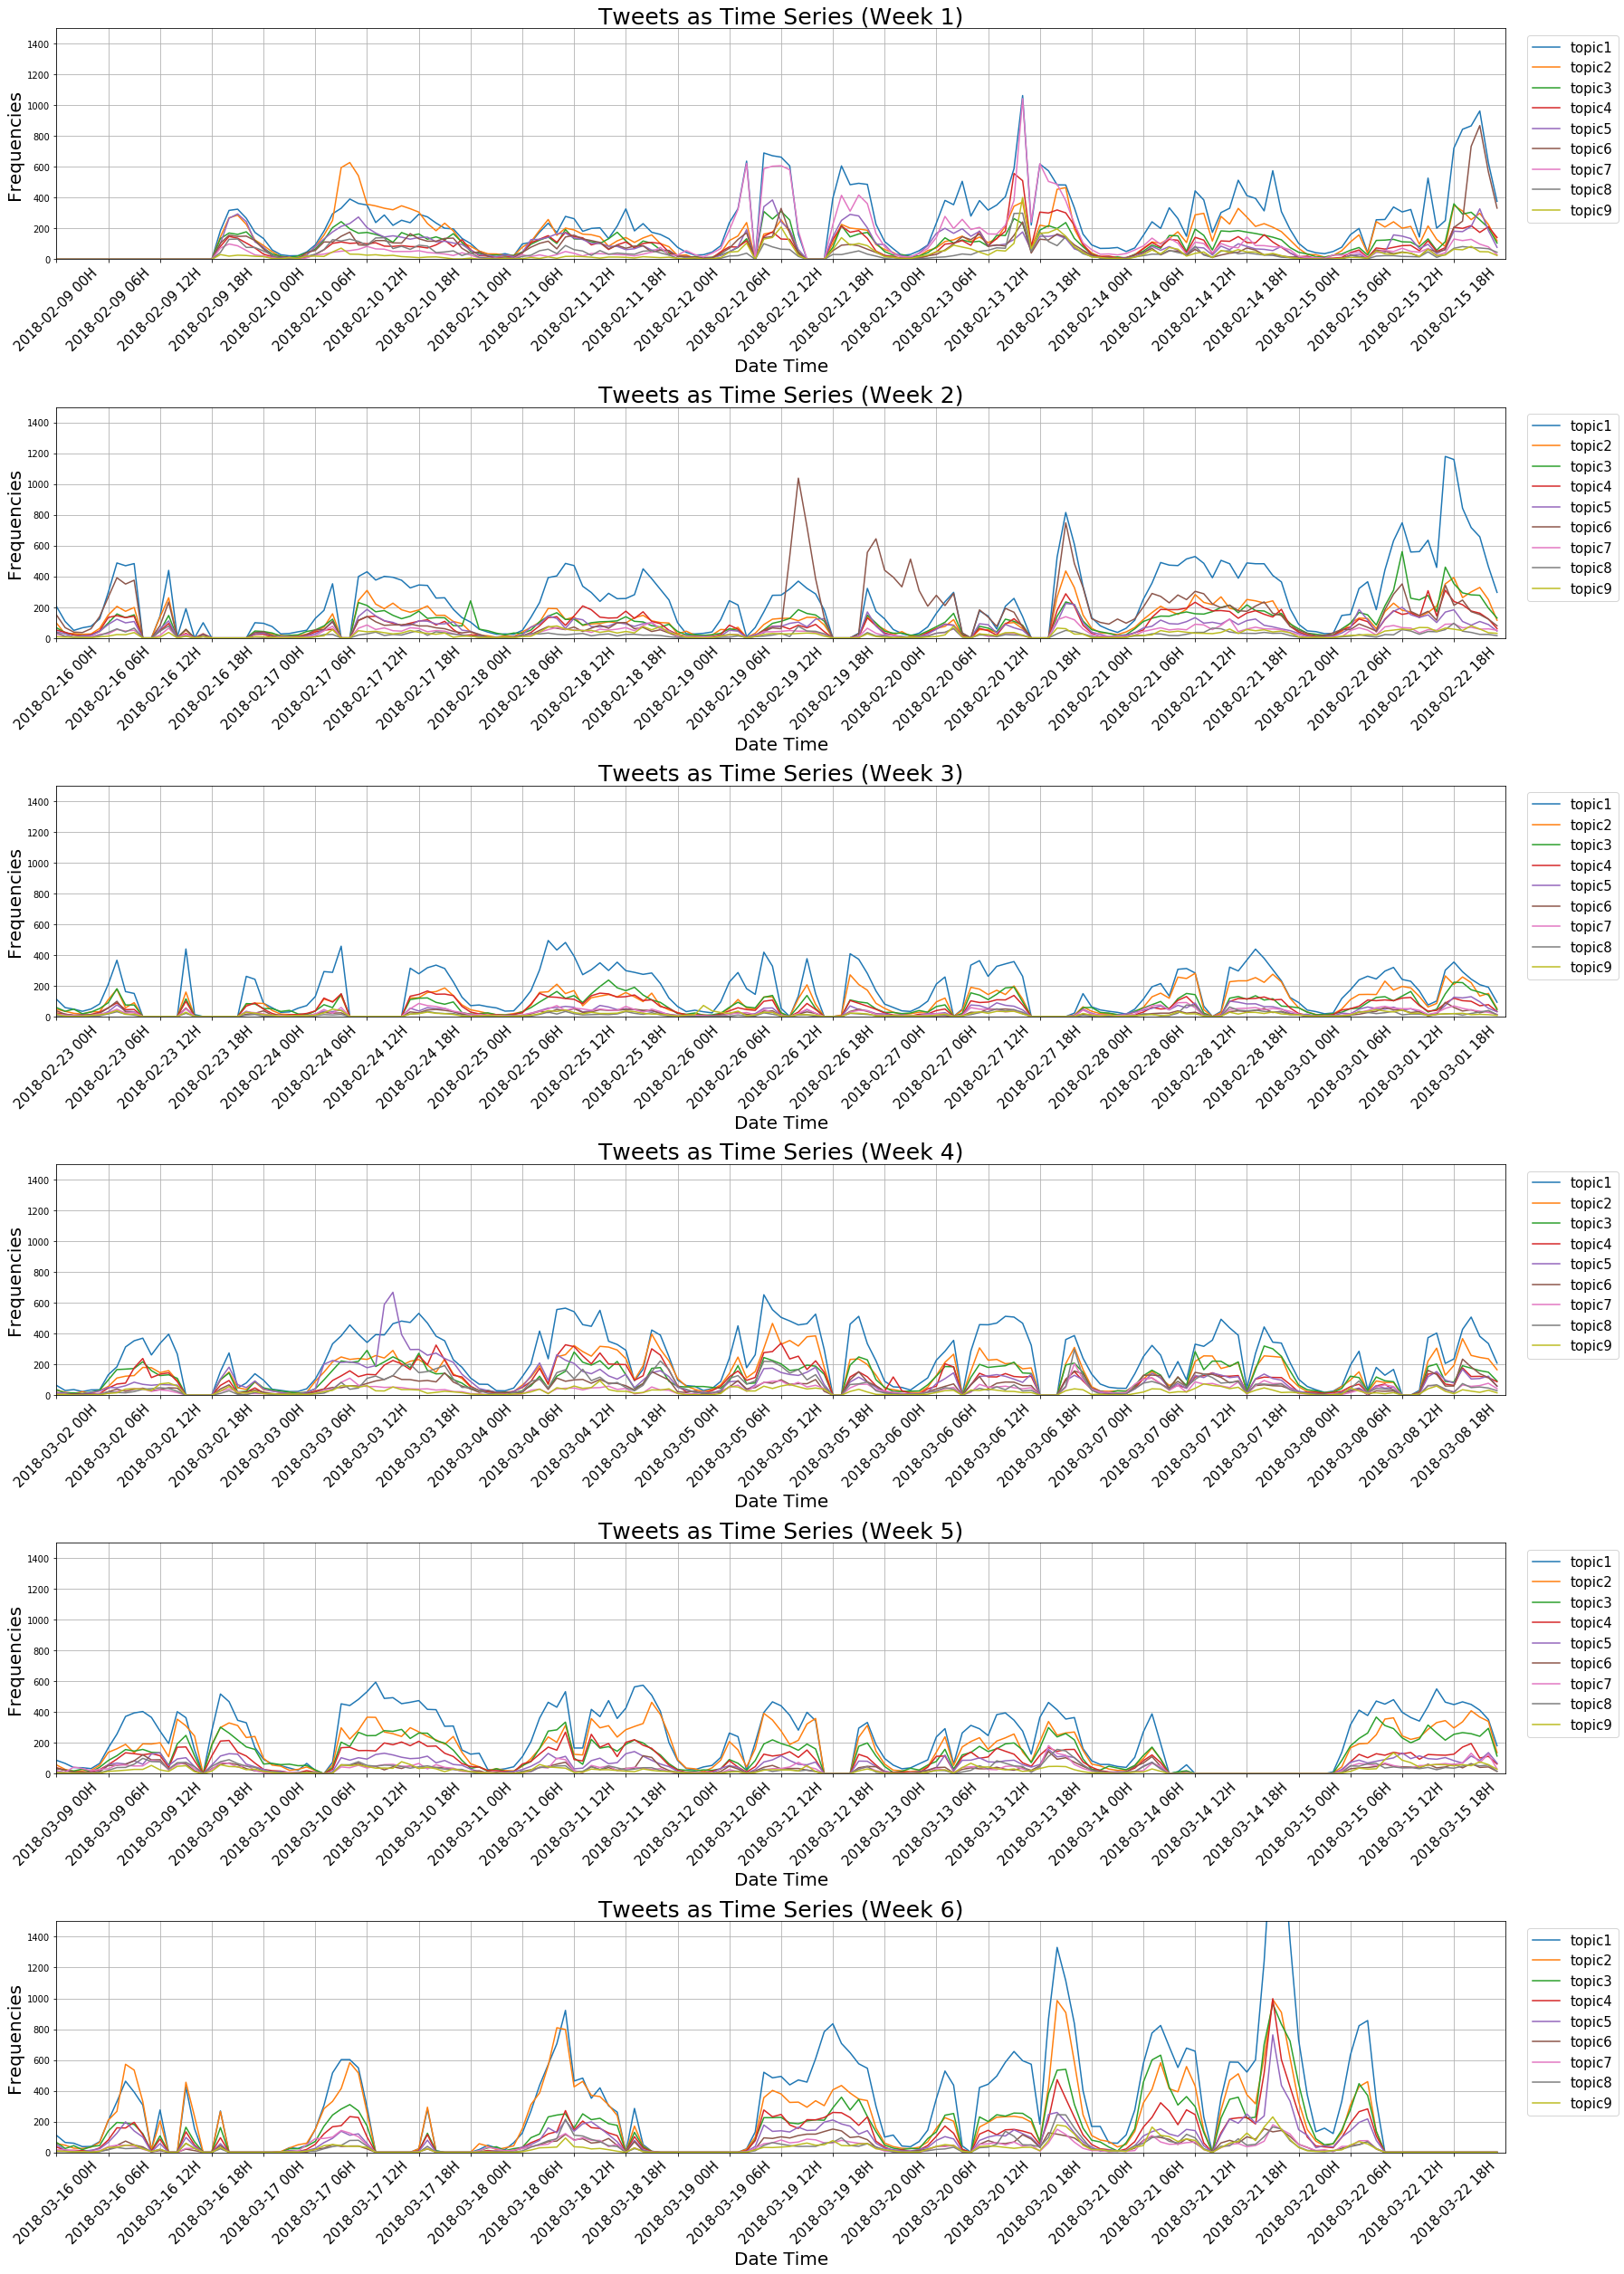

In [24]:
nrows=6
fig,axes=plt.subplots(nrows=nrows, figsize=(25,35))

for i in range(nrows):
    ax = axes[i]
    df = topic_date[i*7*24:(i+1)*7*24]
    df.plot(ax=ax)
    ax.grid()
    ax.set_xticks(range(len(df))[::6])
    ax.set_xticklabels(df[::6].index+"H", rotation=45, size=15)
    ax.set_title("Tweets as Time Series (Week %s)"%(i+1), size=25)
    ax.set_ylabel("Frequencies", size=20)
    ax.set_xlabel("Date Time",size=20)
    ax.set_ylim(0,1500)
    ax.set_xlim(0,len(df))
    ax.legend(bbox_to_anchor=(1.01,1), loc="upper left", fontsize=15)
fig.tight_layout()

In [25]:
fig.savefig("./Result/time_series.pdf")